<h3><center>Matterport Mask R-CNN Project</center></h3>
<h3><center>1. Introduction</center></h3>
<div style="font-family:verdana; word-spacing:1.7px;">
Mask R-CNN is a sophisticated model to implement, especially as compared to a simple or even state-of-the-art deep convolutional neural network model. Source code is available for each version of the R-CNN model, provided in separate GitHub repositories with prototype models based on the Caffe deep learning framework.
<br><br>
The best of breed third-party implementations of Mask R-CNN is the Mask R-CNN Project developed by Matterport. The project is open source released under a permissive license (i.e. MIT license) and the code has been widely used on a variety of projects and Kaggle competitions
<br><br>
<ul>
    There are perhaps three main use cases for using the Mask R-CNN model with the Matterport library; they are:
    <li>Object Detection Application: Use a pre-trained model for object detection on new images.
    <li>New Model via Transfer Learning: Use a pre-trained model as a starting point in developing a model for a new object detection dataset.
    <li>New Model from Scratch: Develop a new model from scratch for an object detection dataset.
    </ul>
    </div>

<h2><center>Part I : Object Detection Application</center></h2>

<h3>Setting up Environment</h3>

In [1]:
cd /kaggle/input/mask-rcnn

/kaggle/input/mask-rcnn


In [2]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 110.5 MB 1.7 kB/s  eta 0:00:01   |███                             | 10.6 MB 8.0 MB/s eta 0:00:13
     |████████████████████████████████| 276 kB 44.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 48.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 503 kB 43.9 MB/s eta 0:00:01
     |████████████████████████████████| 199 kB 55.3 MB/s eta 0:00:01


     |████████████████████████████████| 2.8 MB 53.6 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 49.2 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 93 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 96 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 84 kB 2.3 MB/s  eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=32660ad91ff3a1a893c5961c74c9e78d8369d565bb392dee8401ea332fd466b6
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast


  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
ERROR: pi

In [3]:
cp -r /kaggle/input/mask-rcnn/Mask_RCNN /kaggle/working/

In [4]:
cd /kaggle/working/Mask_RCNN/Mask_RCNN

/kaggle/working/Mask_RCNN/Mask_RCNN


In [5]:
import tensorflow as tf
tf.__version__

'1.15.5'

In [6]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/

<h3><center>1. Importing Libraries</center></h3>

In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from mrcnn.config import Config
from mrcnn.model import MaskRCNN

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

Using TensorFlow backend.


<h3><center>2. Configure Model</center></h3>

<div style="font-family:verdana; word-spacing:1.7px;">
    First, the model must be defined via an instance of the MaskRCNN class. This class requires a configuration object as a parameter. The configuration object defines how the model might be used during training or inference. In this case, the configuration will only specify the number of images per batch, which will be one, and the number of classes to predict. You can see the full extent of the configuration object and the properties that you can override in the config.py file.</div>

In [8]:
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80
    
rcnn = MaskRCNN(mode='inference', model_dir='/kaggle/working/Mask_RCNN/Mask_RCNN/', 
                config=TestConfig())

In [9]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for box in boxes_list:
         # get coordinates
        y1, x1, y2, x2 = box
         # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
         # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red') 
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

<h3><center>3. Load Weights & Detect</center></h3>

<div style="font-family:verdana; word-spacing:1.7px;">
The next step is to load the weights. Now we can make a prediction for our image. <br><br>  We can then make a prediction with the model. Instead of calling predict() as we would on a normal Keras model, will call the detect() function and pass it the single image.<br><br>
    The result contains a dictionary for each image that we passed into the detect() function.The keys of the dictionary of note are as follows:
    <br>
    <ul>
        <li>‘rois’: The bound boxes or regions-of-interest (ROI) for detected objects.
            <li>‘masks’: The masks for the detected objects.
                <li>‘class ids’: The class integers for the detected objects.
                    <li>‘scores’: The probability or confidence for each predicted class.
    </ul>
</div>

In [10]:
WEIGHTS = '/kaggle/input/mask-rcnn/mask_rcnn_coco.h5'
IMG_PATH = '/kaggle/input/mask-rcnn/elephant.jpg'

In [11]:
rcnn.load_weights(WEIGHTS, by_name=True)

img = load_img(IMG_PATH)

img = img_to_array(img)

results = rcnn.detect([img], verbose=0)

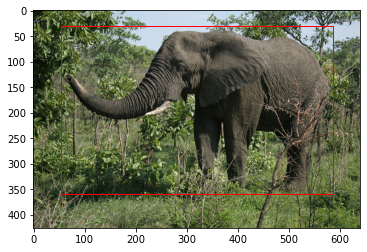

In [12]:
draw_image_with_boxes(IMG_PATH, results[0]['rois'])

<h3><center>4. Object Detection</center></h3>

<div style="font-family:verdana; word-spacing:1.7px;">
The Mask RCNN API provides a function called display instances() that will take the array of pixel values for the loaded image and the aspects of the prediction dictionary, such as the bounding boxes, scores, and class labels, and will plot the photo with all of these annotations.<br><br>
    The function also needs a mapping of ids to class labels. The pre-trained model was fit with a dataset that had 80 (81 including background) class labels
    </div>

In [13]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 
'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 
'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 
'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 
'scissors', 'teddy bear', 'hair drier', 'toothbrush']

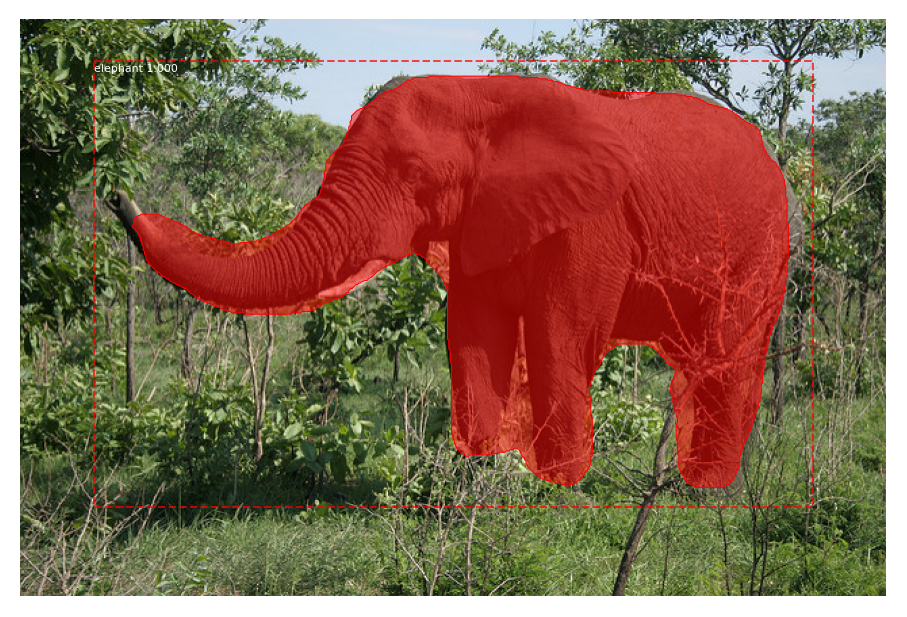

In [14]:
from mrcnn.visualize import display_instances

# get dictionary for first prediction 
r = results[0]

display_instances(img, r['rois'], r['masks'], 
                  r['class_ids'], class_names, r['scores'])


In [15]:
r.keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

In [16]:
r['scores']

array([0.9999379], dtype=float32)

<h2><center>PART II : Develop New Model</center></h2>

<div style="font-family:verdana; word-spacing:1.7px;">
The Mask R-CNN introduced in the 2018 paper titled Mask R-CNN is the most recent variation of the family of models and supports both object detection and object segmentation. Object segmentation not only involves localizing objects in the image but also specifies a mask for the image, indicating exactly which pixels in the image belong to the object.
    <br><br>
The Mask R-CNN is designed to learn to predict both bounding boxes for objects as well as masks for those detected objects, and the kangaroo dataset does not provide masks. As such, we will use the dataset to learn a kangaroo object detection task, and ignore the masks and not focus on the image segmentation capabilities of the model.
    </div>

<h3><center>1. Parse Annotation File</center></h3>

In [17]:
ANNOT_PATH = '/kaggle/input/mask-rcnn/kangaroo/kangaroo/annots/'
KANGAROO_PATH = '/kaggle/input/mask-rcnn/kangaroo/kangaroo/images/'
ROOT_DIR = '/kaggle/input/mask-rcnn/kangaroo/kangaroo/'

In [18]:
import xml.dom.minidom

dom = xml.dom.minidom.parse(ANNOT_PATH + '00001.xml') 
pretty_xml_as_string = dom.toprettyxml()

print(pretty_xml_as_string)


<?xml version="1.0" ?>
<annotation>
	
	
	<folder>Kangaroo</folder>
	
	
	<filename>00001.jpg</filename>
	
	
	<path>/home/andy/Desktop/Kangaroo/stock-photo-two-kids-in-the-zoo-feeding-kangaroo-296180786.jpg</path>
	
	
	<source>
		
		
		<database>Unknown</database>
		
	
	</source>
	
	
	<size>
		
		
		<width>450</width>
		
		
		<height>319</height>
		
		
		<depth>3</depth>
		
	
	</size>
	
	
	<segmented>0</segmented>
	
	
	<object>
		
		
		<name>kangaroo</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>233</xmin>
			
			
			<ymin>89</ymin>
			
			
			<xmax>386</xmax>
			
			
			<ymax>262</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>kangaroo</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>134</xmin>
			
			
			<ymin>105</ymin>
			
			
			<xmax>341</xmax>
			
			
			<ymax>253</ymax>
			
		

<div style="font-family:verdana; word-spacing:1.7px;">
 We can see that the annotation file contains a size element that describes the shape of the photograph, and object elements describe the bounding boxes for the kangaroo objects in the photograph.   
    </div>

In [19]:
from xml.etree import ElementTree

def extract_boxes(filename):
    # load and parse the file
    tree = ElementTree.parse(filename)
    # get the root of the document
    root = tree.getroot()
    
    boxes = list()
    
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text) 
        ymin = int(box.find('ymin').text) 
        xmax = int(box.find('xmax').text) 
        ymax = int(box.find('ymax').text) 

        coors = [xmin, ymin, xmax, ymax] 
        boxes.append(coors)

    width = int(root.find('.//size/width').text) 
    height = int(root.find('.//size/height').text) 
    
    return boxes, width, height

boxes, w, h = extract_boxes(ANNOT_PATH + '00001.xml')
print(boxes, w, h)

[[233, 89, 386, 262], [134, 105, 341, 253]] 450 319


<h3><center>2. Develop Kangaroo Dataset object</center></h3>
<div style="font-family:verdana; word-spacing:1.7px;">
Train, validation, and test datasets are managed by a mrcnn.utils.Dataset object. We can define a new class that extends the mrcnn.utils.Dataset. We can define a function load_dataset() to load the data<br><br>
    To use a Dataset object, it is instantiated, then our custom load function must be called, then finally the built-in prepare() function is called.<br><br>
    Classes are defined by calling the built-in add class() function and specifying the source (the name of the dataset), the class id or integer for the class (e.g. 1 for the first class as 0 is reserved for the background class), and the class name
(e.g. kangaroo).<br><br>
    Objects are defined by a call to the built-in add image() function and specifying the source (the name of the dataset), a unique image id (e.g. the filename without the file extension like 00001), and the path for where the image can be loaded
    </div>

In [20]:
from mrcnn.utils import Dataset

class KangarooDataset(Dataset):
    
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()

        boxes = list()

        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text) 
            ymin = int(box.find('ymin').text) 
            xmax = int(box.find('xmax').text) 
            ymax = int(box.find('ymax').text) 

            coors = [xmin, ymin, xmax, ymax] 
            boxes.append(coors)

        width = int(root.find('.//size/width').text) 
        height = int(root.find('.//size/height').text) 

        return boxes, width, height
    
    
    def load_dataset(self, img_path, annot_path, is_train=True):
        self.add_class("dataset", 1, "kangaroo")
        
        for filename in os.listdir(img_path):
            image_id = filename[:-4]
            
            # skip bad images
            if image_id in ['00090']: 
                continue
            
            if is_train and int(image_id) >= 150:
                continue
            if not is_train and int(image_id) < 150:
                continue
            
            img_p = img_path + filename
            ann_p = annot_path + image_id + '.xml'
            
            self.add_image('dataset', image_id=image_id, path=img_p, 
                           annotation=ann_p)

    
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        
        boxes, w, h = self.extract_boxes(path)
        
        masks = np.zeros([h, w, len(boxes)], dtype='uint8')
        
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('kangaroo'))
        
        return masks, np.asarray(class_ids, dtype='int32')
    
    def image_reference(self, image_id): 
        info = self.image_info[image_id] 
        return info['path']

In [21]:
train_set = KangarooDataset() 

train_set.load_dataset(KANGAROO_PATH, ANNOT_PATH, is_train=True) 

train_set.prepare()

print('Train: %d' % len(train_set.image_ids))

Train: 131


In [22]:
test_set = KangarooDataset() 

test_set.load_dataset(KANGAROO_PATH, ANNOT_PATH, is_train=False) 

test_set.prepare()

print('Test: %d' % len(test_set.image_ids))

Test: 32


<h3><center>3. Test Kangaroo Dataset object</center></h3>
<div style="font-family:verdana; word-spacing:1.7px;">
The first useful test is to confirm that the images and masks can be loaded correctly. We can test this by creating a dataset and loading an image via a call to the load image() function with an image id, then load the mask for the image via a call to the load mask() function with the same image id.    
    </div>

In [23]:
image_id = 0

image = train_set.load_image(image_id)
print(image.shape)

mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)

(683, 1024, 3)
(683, 1024, 1)


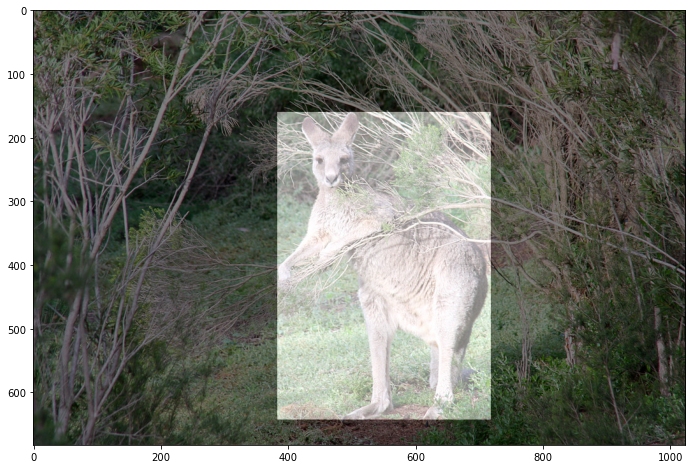

In [24]:
_ = plt.figure(figsize=(15,8))
_ = plt.imshow(image)
_ = plt.imshow(mask[:,:,0], cmap='gray', alpha=0.5)
_ = plt.show()

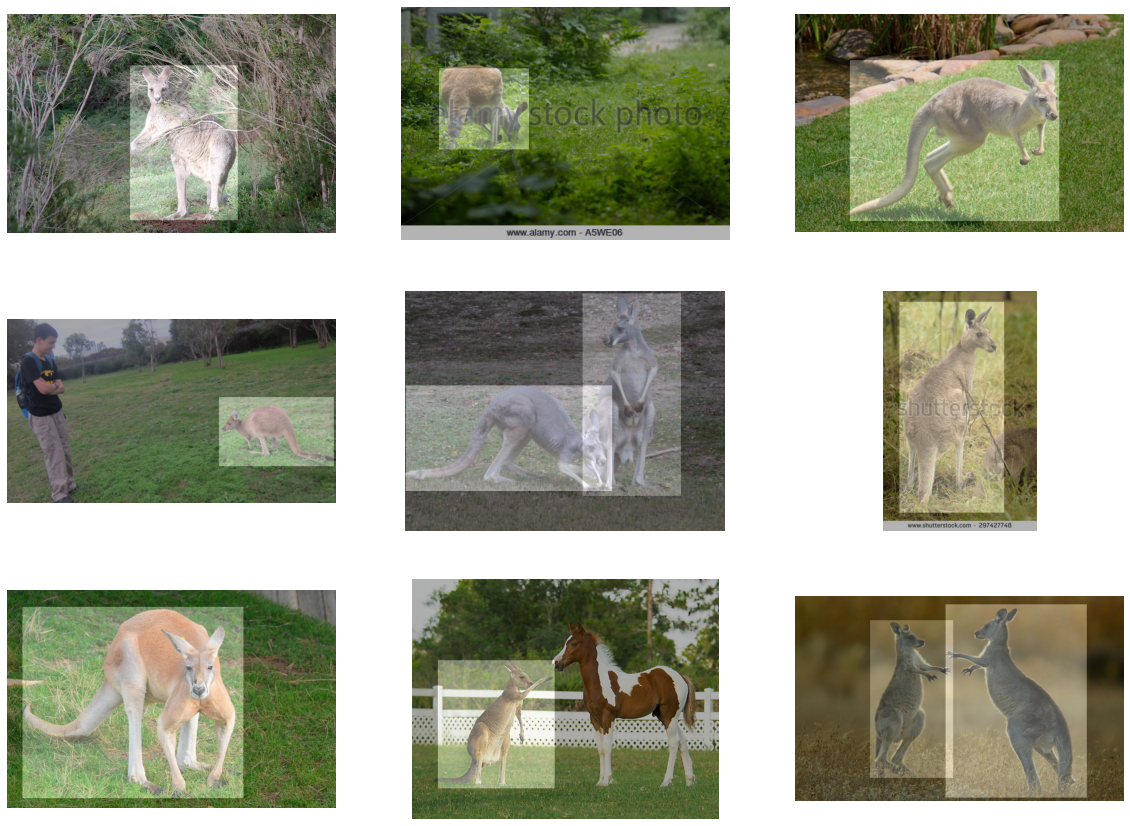

In [25]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    
    image = train_set.load_image(i)
    
    mask, _ = train_set.load_mask(i)
    
    plt.imshow(image)
    for j in range(mask.shape[2]):
        plt.imshow(mask[:,:,j], cmap='gray', alpha=0.3)

plt.show()

<h4>Debugging</h4>

In [26]:
for image_id in train_set.image_ids:
  
    info = train_set.image_info[image_id]
  
    print(info)

{'id': '00091', 'source': 'dataset', 'path': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/images/00091.jpg', 'annotation': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/annots/00091.xml'}
{'id': '00130', 'source': 'dataset', 'path': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/images/00130.jpg', 'annotation': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/annots/00130.xml'}
{'id': '00109', 'source': 'dataset', 'path': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/images/00109.jpg', 'annotation': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/annots/00109.xml'}
{'id': '00111', 'source': 'dataset', 'path': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/images/00111.jpg', 'annotation': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/annots/00111.xml'}
{'id': '00056', 'source': 'dataset', 'path': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/images/00056.jpg', 'annotation': '/kaggle/input/mask-rcnn/kangaroo/kangaroo/annots/00056.xml'}
{'id': '00030', 'source': 'dataset', 'path': '/kaggle/input/mask-rcnn/kangaroo/kangar

<h3><center>4. Extract Boundary Boxes</center></h3>

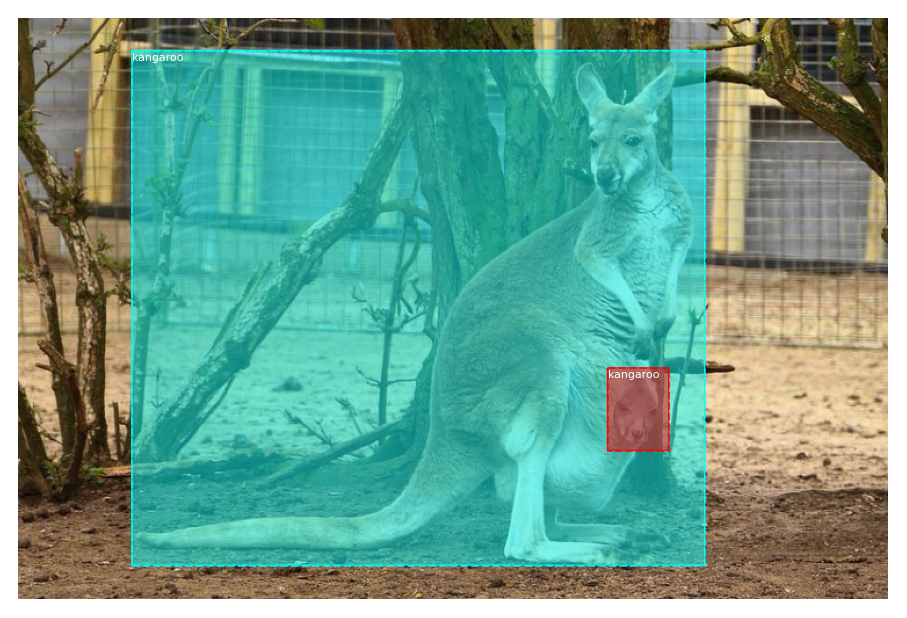

In [27]:
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

image_id = 15

image = train_set.load_image(image_id)

mask, class_ids = train_set.load_mask(image_id)

bbox = extract_bboxes(mask)

display_instances(image, bbox, mask, class_ids, train_set.class_names)

<h3><center>5. Configuration for training</center></h3>
<div style="font-family:verdana; word-spacing:1.7px;">
The pre-defined model architecture and weights can be loaded. This can be achieved by calling the load_weights().<br><br>
Class-specific output layers are removed using exclude argument.<br><br>
We can also specify what layers to train. In this case, we will only train the heads, that is the output layers of the model.
    </div>

In [28]:
from mrcnn.config import Config

class KangarooConfig(Config):
    
    NAME = "kangaroo_cfg"
    NUM_CLASSES = 1 + 1
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 3 
    
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 7
    DETECTION_MAX_INSTANCES = 7
    
    STEPS_PER_EPOCH = 131

In [29]:
config = KangarooConfig()
config.display()

model = MaskRCNN(mode='training', model_dir='/kaggle/working/Mask_RCNN/Mask_RCNN/', 
                 config=config)

# load weights (mscoco) and exclude the output layers 
model.load_weights('/kaggle/input/mask-rcnn/mask_rcnn_coco.h5', by_name=True, 
                   exclude=["mrcnn_class_logits","mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     3
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        7
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 3
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE           

<h3><center>5. Training Output layers</center></h3>
<div style="font-family:verdana; word-spacing:1.7px;">

In [30]:
# train weights (output layers or ✬heads✬)
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, 
            epochs=1, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /kaggle/working/Mask_RCNN/Mask_RCNN/kangaroo_cfg20210224T0711/mask_rcnn_kangaroo_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDi

<h3><center>6. Evaluate Model</center></h3>

<div style="font-family:verdana; word-spacing:1.7px;">
The performance of a model for an object recognition task is often evaluated using the mean absolute precision, or mAP. We are predicting bounding boxes so we can determine whether a bounding box prediction is good or not based on how well the predicted and actual bounding boxes overlap. This can be calculated by dividing the area of the overlap by the total area of both bounding boxes, or the intersection divided by the union, referred to as intersection over union, or IoU. A perfect bounding box prediction will have an IoU of 1. It is standard to assume a positive prediction of a bounding box if the IoU is greater than 0.5, e.g. they overlap by 50% or more. Precision refers to the percentage of the correctly predicted bounding boxes (IoU > 0.5) out of all bounding boxes predicted. Recall is the percentage of the correctly predicted bounding boxes (IoU > 0.5) out of all objects in the photo.<br><br>
    The average or mean of the average precision (AP) across all of the images in a dataset is called the mean average precision, or mAP. The mask-rcnn library provides a mrcnn.utils.compute_ap to calculate the AP and other metrics for a given images.
    </div>

In [36]:
WEIGHTS_PATH = '/kaggle/working/Mask_RCNN/Mask_RCNN/kangaroo_cfg20210224T0711/'

In [35]:
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image

class PredictionConfig(Config):
    NAME = "kangaroo_cfg"
    
    NUM_CLASSES = 1 + 1
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
def evaluate_model(dataset, model, cfg):
    APs = list()
    for image_id in dataset.image_ids:
        # load image, bounding boxes and masks for the image id
        image, _, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, 
                                                                image_id,use_mini_mask=False)
        
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        
        # convert image into one sample
        sample = np.expand_dims(scaled_image, 0)
        
        yhat = model.detect(sample, verbose=0)
        
        # extract results for first sample
        r = yhat[0]
        
        AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, 
                                 r["rois"], r["class_ids"], r["scores"], r["masks"])
        APs.append(AP)
    
    mAP = np.mean(APs)
    return mAP

In [37]:
cfg = PredictionConfig()

model = MaskRCNN(mode='inference', model_dir='/kaggle/working/Mask_RCNN/Mask_RCNN/', 
                 config=cfg)

model.load_weights(WEIGHTS_PATH+'mask_rcnn_kangaroo_cfg_0000.h5', by_name=True)

train_mAP = evaluate_model(train_set, model, cfg)

print("Train mAP: %.3f" % train_mAP)

test_mAP = evaluate_model(test_set, model, cfg)

print("Test mAP: %.3f" % test_mAP)

Re-starting from epoch 0
Train mAP: 0.864
Test mAP: 0.938


<h3><center>7. Detect Kangaroos in New Photos</center></h3>

In [42]:
from mrcnn.model import mold_image

def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
    for i in range(n_images):
        image = dataset.load_image(i)
        mask, _ = dataset.load_mask(i)
        scaled_image = mold_image(image, cfg)
        sample = np.expand_dims(scaled_image, 0)
        yhat = model.detect(sample, verbose=0)[0]
        
        plt.figure(figsize=(20,15))
        plt.subplot(n_images, 2, i*2+1)
        plt.axis('off')
        plt.imshow(image)
        
        if (i==0):
            plt.title('Actual')
        
        for j in range(mask.shape[2]):
            plt.imshow(mask[:,:,j], cmap='gray', alpha=0.3)            
        
        plt.subplot(n_images, 2, i*2+2)
        plt.axis('off')
        plt.imshow(image)
        
        if (i==0):
            plt.title('Predicted')
            
        ax = plt.gca()
        
        for box in yhat['rois']:
            y1, x1, y2, x2 = box
            width, height = x2 - x1, y2 - y1
            rect = Rectangle((x1, y1), width, height, fill=False, color='red')
            ax.add_patch(rect)
            
        plt.show()

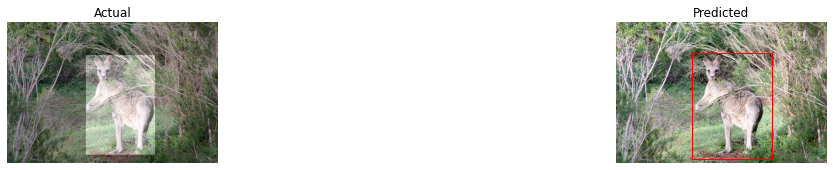

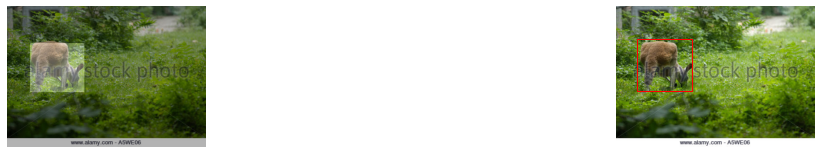

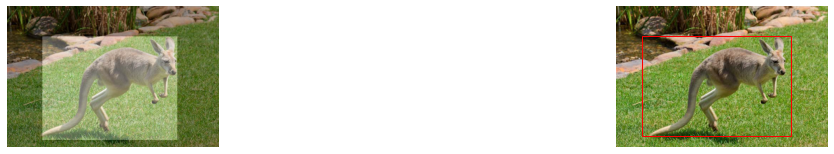

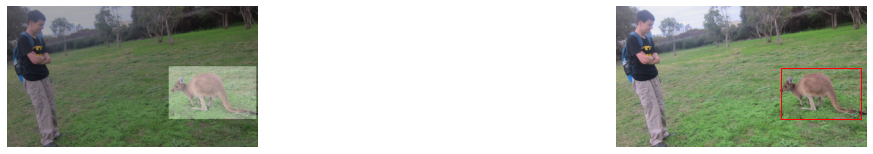

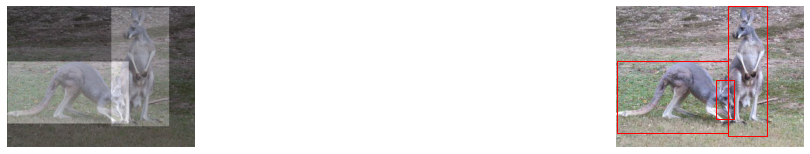

In [43]:
plot_actual_vs_predicted(train_set, model, cfg)